<a href="https://colab.research.google.com/github/khanfs/ComplexSystemsModelling-Bayesian/blob/main/05_Spatial_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 05: Spatial models

So far in this course, we considered systems that change with time, but not those that change with space.
Many biological systems do have some dependence on space, for example:

- ...

Frequently these systems involve the concepts of *diffusion* and/or *travelling waves*.

We will consider spatial systems as *partial differential equation (PDE)* models.
However, note that analytical and numerical methods to solve PDE systems require more complicated methods than we have previously seen.

## Diffusion

It is possible to derive a general equation for *diffusion* based on a Markov process.

Consider a collection of particles which move according to a *random walk*.
They have average step length $\Delta x$ for every time unit $\tau$.
We assume that the proability of moving left and right are equal (each one-half).
The $x$-axis can be subdivided into segments of length $\Delta x$.

![Random walk](images/05_mc.png)

Let $C(x,t)$ be the number of particles within segment $[x,x+\Delta x]$ at time $t$.
Then:

$$ C(x,t+\tau) = \tfrac{1}{2} C(x-\Delta x,t) + \tfrac{1}{2} C(x+\Delta x,t) $$

We then need to use the Taylor-series expansions of:

$$\begin{aligned}
    C(x,t+\tau) &= C(x,t) + \frac{\partial C}{\partial t} \tau + \ldots \\
    C(x\pm\Delta x,t) &= C(x,t) \pm \frac{\partial C}{\partial x} \Delta x + \tfrac{1}{2}\frac{\partial^2 C}{\partial x^2} \Delta x^2 + \ldots
    \end{aligned}$$
    
Substituting these (to first degree in $\tau$ in second degree in $\Delta x$), gives:

$$\begin{aligned}
    C(x,t) + \frac{\partial C}{\partial t} \tau 
    &= \tfrac{1}{2}\left(C(x,t) + \frac{\partial C}{\partial x} \Delta x + \tfrac{1}{2}\frac{\partial^2 C}{\partial x^2} \Delta x^2\right) + \tfrac{1}{2}\left(C(x,t) - \frac{\partial C}{\partial x} \Delta x + \tfrac{1}{2}\frac{\partial^2 C}{\partial x^2} \Delta x^2 \right) \\
    \frac{\partial C}{\partial t} \tau 
    &= \tfrac{1}{2}\frac{\partial^2 C}{\partial x^2} \Delta x^2
    \end{aligned}$$
    
Dividing through by $\tau$, we look for a particular limit as $\tau\rightarrow 0$, $\Delta x \rightarrow 0$, such that:

$$ \frac{(\Delta x)^2}{2\tau} = \text{constant} = D $$

So:

$$ \frac{\partial C}{\partial t} = \frac{(\Delta x)^2}{2\tau}\frac{\partial^2 C}{\partial x^2} = D \frac{\partial^2 C}{\partial x^2}$$

The parameter $D$ is known as the *diffusion coefficient*.

### Some consequences of the diffusion equation

Note that $D$ has units:

$$ D = \frac{\text{distance}^2}{\text{time}} $$

So:

- The average distance through which diffusion works in a given time is proportional to $\sqrt{Dt}$.
- The average time taken to diffuse a distance $d$ is proportional to $\frac{d^2}{D}$.

**For example:** $D=10^{-5}\text{cm}^2\text{sec}^{-1}$ for oxygen in water.

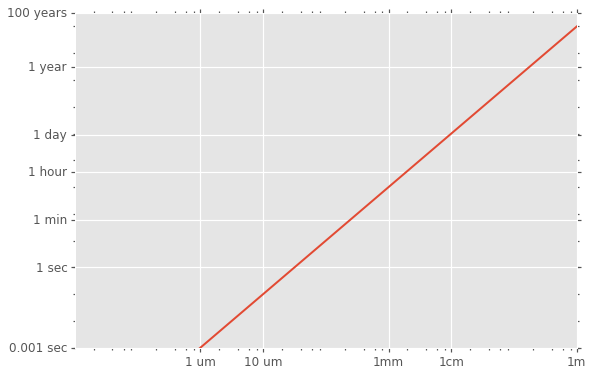

<function python.f05.diffusion>

In [ ]:
from python.f05 import *
%matplotlib inline
    
interact(diffusion)

What does this tell us about diffusion within cells?

- Average cell size is $10^{-6}$m.
- Some neurons have axons greater than 1m in length.

## Example, neurotransmitters

Consider a neurotransmitter, which is released at one neuron, travels across the synapse, and recieved by receptors on the neighbouring neuron.

> Neurotransmitters are endogenous chemicals that enable neurotransmission. They transmit signals across a chemical synapse, such as in a neuromuscular junction, from one neuron (nerve cell) to another "target" neuron, muscle cell, or gland cell. Neurotransmitters are released from synaptic vesicles in synapses into the synaptic cleft, where they are received by receptors on other synapses. [Wikipedia](https://en.wikipedia.org/wiki/Neurotransmitter)

We'd like to know the average length of time that a neurotransmitter takes to diffuse across the synapse.

### Model outline

**Aim:** To calculate the average length of time that a neurotransmitter takes to diffuse across the synapse.

**Scale:** Molecular

**Approach/method:** Partial differential equation

**Simplifications:**

- 1-dimensional
- 1 source and 1 sink neuron.
- No external perturbations.

**Assumptions:**

- Signalling is long-lasting, so we can examine the steady-states.
- Signalling is consistent across time.

### Model mathematics

Consider the 1D system where particles enter at $x=L$ and diffuse to $x=0$. Particles cannot leave the region $[0,L]$.

The *mean transit time* $\tau$ of a particle is independent of the presence or absence of other partivles and so it is sufficient to find the steady-state solution to the system:

$$ D \frac{\partial^2 c}{\partial x^2} = 0$$

Assume that $c(L) = c_0$, $c(0) = 0$.
In our equation, $c$ only depends on $x$, so we have an ODE: 

$$ D \frac{d^2 c}{d x^2} = 0$$

This has solutions of the form:

$$ c(x) = \alpha x + \beta $$

Using the boundary conditions:

$$\begin{aligned}
    c(0) = 0 &\implies \beta = 0\\
    c(L) = c_0 &\implies \alpha = \frac{c_0}{L}
    \end{aligned}$$
    
So:

$$ c(x) = \frac{c_0}{L} x $$

Assume that there are $N$ particles in the region.
Then:

$$ \frac{dN}{dt} = \text{entering rate} - \text{removal rate} = F - \lambda N $$

Where: $F$ is the total number of particles entering the region per unit time; $\lambda$ is the average removal rate of particles, so $\lambda = \frac{1}{\tau}$, where $\tau$ is the mean transit time (the quantity we wish to estimate).
At steady-state this means:

$$ F = \lambda N = \frac{N}{\tau} \implies \tau = \frac{N}{F} $$

So we need to calculate $N$ and $F$.

The total number of particles, $N$, is:

$$ N = \int_0^L c(x)\; dx = \frac{c_0}{L}\int_0^L x\; dx 
    =\frac{c_0}{L} \frac{L^2}{2} = \frac{c_0 L}{2} $$
    
Particles enter $x=L$ due to *diffusive flux*, which (in 1-dimension) is given by:

$$ J = - D\frac{\partial c}{\partial x} $$

Assuming a wall of unit area at $x=L$, we have:

$$ F = \text{flux} \times \text{area} = - J \times 1 = D\frac{c_0}{L} $$

So we have a mean transit time from source to sink of:

$$ \tau = \frac{N}{F} = \frac{c_0 L}{2} \frac{L}{D c_0} = \frac{L^2}{2 D} $$

Note that this equation only holds for a 1-dimensional system, and is different for 2- or 3-dimensional systems.

### Model discussion

What does this result mean in terms of the biology?

## Example, macrophages

> Macrophages are a type of white blood cell that engulfs and digests cellular debris, foreign substances, microbes, cancer cells, and anything else that does not have the types of proteins specific to the surface of healthy body cells on its surface in a process called phagocytosis. [Wikipedia](https://en.wikipedia.org/wiki/Macrophage)

One important role of macrophages is to clear the lung surface of bacteria, in order to do this they must move through the *alveoli*.
We want to know: is random motion sufficient for macrophages to find bacteria?

### Model outline

**Aim:** To investigate whether random motion is sufficient for macrophages to find bacteria.

**Scale:** Cell/bacteria environment

**Approach/method:** Partial differential equation

**Simplifications:**

- 2-dimensional
- Only one macrophage.
- Only one bacteria within a alveoli.

**Assumptions:**

- A macrophage must find the bacteria before it divides, otherwise infection occurs.
- Macrophage moves around the alveoli in alternating tumble and swim phases (used to calculate $D$).

### Model mathematics

We must use a 2-dimensional form of the above equation, the mean transit time for a particle entering a disc of radius $L$ to reach a sink of radius $a$ at the centre of the disc.

![2D sink](images/05_2dsink.png)

This has a solution:

$$\tau = \frac{L^2}{2 D} \ln\frac{L}{a} $$

We repose the question: a macrophage enters an alveoli of radius $L$, what is the mean time it takes to reach a bacteria with radius of detection $a$?

For this system we have:

$$\begin{aligned}
    a &= \text{radius of bacterial cell} = \text{20 μm} \\
    L &= \text{radius of alveoli} = \text{280 μm} \\
    D &= \text{22.5 μm min$^{-1}$}
    \end{aligned}$$
    
So:

$$\tau = \frac{280^2}{2 \times 22.5} \ln\frac{280}{20}
    = 4.6 \times 10^{3} \text{ min} = 76 \text{ hours}$$
    
How does this compare with a bacterial doubling rate of (say) 5 hours.

In [ ]:
interact(diff2d)

tau = 4597 min = 77 hours


<function python.f05.diff2d>

### Model discussion

Is the model realistic? Is it useful?

## Example,  invasive alien species model

> The signal crayfish, Pacifastacus leniusculus, is a North American species of crayfish. It was introduced to Europe in the 1960s to supplement the Scandinavian Astacus astacus fisheries, which were being damaged by crayfish plague... The signal crayfish is now considered an invasive species across Europe and Japan, ousting native species there. [Wikipedia](https://en.wikipedia.org/wiki/Signal_crayfish)

Suppose that a population of signal crayfish have escaped captivity, from a single fishery at the mouth of a river.
We want to model how their population will spread upstream.

### Model outline

**Aim:** To calculate how quickly the crayfish population will move upstream.

**Scale:** Population/environment

**Approach/method:** PDE

**Simplifications:**

- The river can be modelled as 1-dimensional.
- The crayfish population can be modelled as continuous.
- ...

**Assumptions:**

- The population has a (constant) carrying capacity at each unit interval of the river.

### Model mathematics

Let $u(x,t)$ be the number of crayfish at position $x$ at time $t$.
Then we can model this using an extension of logistic growth to include linear diffusion, called *Fisher's equation*:

$$ \frac{\partial u}{\partial t} = D\frac{\partial^2 u}{\partial x^2} + ku(1-u) $$

We will use the change of variables:

$$ t^\ast = k t \text{ and } x^\ast = \sqrt{\frac{k}{D}}\, x $$

This gives us (omitting the asterisks):

$$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + u(1-u) $$

The boundary conditions are:

$$\begin{aligned}
    \lim_{x\rightarrow-\infty} u(x,t) &= 1 \\
    \lim_{x\rightarrow\infty} u(x,t) &= 0 
    \end{aligned}$$
    
### Travelling wave solution

A solution $u(x,t)$ of Fisher's equation is called a *travelling wave* solution if there is a function $U(z)$ such that:

$$ u(x,t) = U(z), \;\; z = x-ct $$

Where $c$ (non-zero) is called the *wavespeed*.
This will mean that the population of crayfish travels as a wave with constant profile upstream, with speed $c>0$.

![Wave example](images/05_wave.png)

This gives:

$$\begin{aligned}
    u &= U \\
    \frac{\partial u}{\partial t} &= \frac{\partial}{\partial t} U(x-ct) = -c\frac{d U}{d z} \\
    \frac{\partial u}{\partial x} &= \frac{\partial}{\partial x} U(x-ct) = \frac{d U}{d z} \\
    \frac{\partial^2 u}{\partial x^2} &= \frac{\partial^2}{\partial x^2} U(x-ct) = \frac{d^2 U}{d z^2}
    \end{aligned}$$
    
We can substitute these into Fisher's equation to get:

$$  \frac{d^2 U}{d z^2} +c\frac{d U}{d z} + U(1-U) = 0 $$

We can convert this into a two dimensional solution using $V=\frac{d U}{d z}$:

$$\begin{aligned}
    \frac{d U}{d z} &= V \\
    \frac{d V}{d z} &= -cV -U(1-U)
    \end{aligned}$$

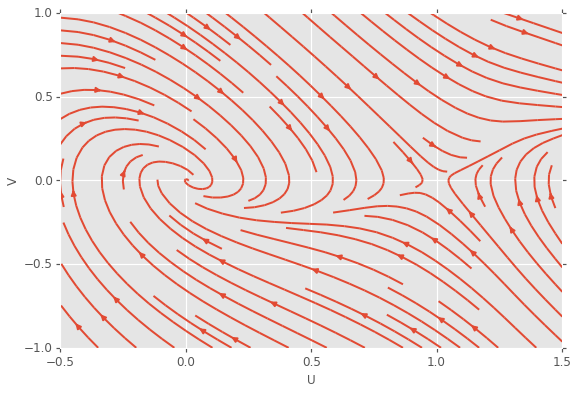

<function python.f05.plot_fisher>

In [ ]:
interact(plot_fisher)

The steady-states of this system are the solutions to the equations:

$$\begin{aligned}
    0 &= V \\
    0 &= -cV -U(1-U)
    \end{aligned}$$
    
So $V=0$ and either $U=0$ or $U=1$:

$$ (0,0) \text{ and } (1,0) $$

The Jacobian matrix is:

$$ J = \begin{bmatrix}0 & 1 \\ 2U - 1 & -c \end{bmatrix} $$

So for the $(0,0)$ steady-state:

$$ J = \begin{bmatrix}0 & 1 \\ - 1 & -c \end{bmatrix}
    \implies \det(J) = 1, \text{trace}(J) = -c$$
    
Which implies that this steady-state is stable.
Furthermore $\text{disc}(J) = c^2 - 4$, so $(0,0)$ is a stable node for $c>2$ and a stable spiral for $c<2$.

So for the $(1,0)$ steady-state:

$$ J = \begin{bmatrix}0 & 1 \\ 1 & -c \end{bmatrix}
    \implies \det(J) = -1$$
   
Which implies that this steady-state is a saddle point.

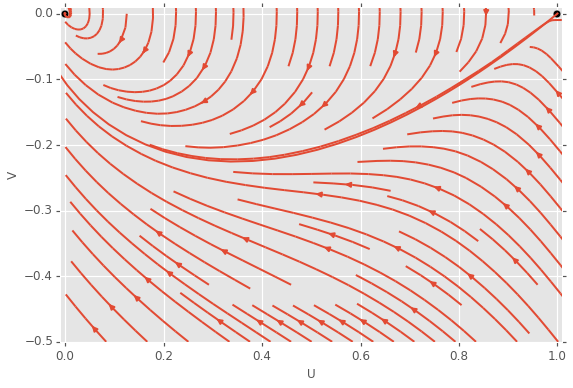

<function python.f05.plot_fisher2>

In [ ]:
interact(plot_fisher2)

Recall our boundary conditions:

$$\begin{aligned}
    \lim_{x\rightarrow-\infty} u(x,t) &= 1 \\
    \lim_{x\rightarrow\infty} u(x,t) &= 0 
    \end{aligned}$$

There is a trajectory from $(1,0)$ to $(0,0)$ lying entirely withing the region $0\leq U\leq 1$, $\frac{d U}{d z}\leq 0$ for all $c\geq 2$.

There are solutions for $c < 2$ but they are physically unrealistic since $U<0$ for some $z$.

As $\frac{d U}{d z}< 0$ on this trajectory, we know that the wave profile will be strictly decreasing, and look similar to:

![Wave profile](images/05_waveprofile.png)

Extending this further, there is a unique travelling wave solution for Fisher's equation that satisfies the boundary conditions for each $c\geq 2$.

Actually, we know that if $u(x,0)$ has a property known as *compact support* then $u(x,t)$ evolves towards a travelling wave with minimum wavespeed $c_\text{min} = 2$.

In dimensional terms, this gives a speed of propagation of $2\sqrt{\tfrac{D}{k}}$.
So the wave can move faster than the rate of diffusion.

### Model discussion

Is the model realistic? Is it useful?

## Example, the cell cycle

> The cell cycle or cell-division cycle is the series of events that take place in a cell leading to its division and duplication (replication) that produces two daughter cells. [Wikipedia](https://en.wikipedia.org/wiki/Cell_cycle)

### Model outline

**Aim:** To construct a model of the number of cells at each stage of the cell cycle.

**Scale:** Single cell (average)

**Approach/method:** ODE/PDE

**Simplifications:**

- The number of cells in a particular stage can be modelled as a continuous number.
- No outside influences.
- No carrying capacity (cells can divide forever).

**Assumptions:**

- There are $k>1$ stages in the cell-cycle.
- Cells change to the next stage at some rate $k$.

### Model mathematics

Assume that there are $k$ stages in the cell-cycle.
Let $N_1$ be the population of new-born daughter cells, and:

$$N_1 \overset{\lambda}{\rightarrow} N_2 \overset{\lambda}{\rightarrow} \ldots \overset{\lambda}{\rightarrow} N_k \overset{\lambda}{\rightarrow} N_1$$ 

That is, progression to the next stage at some rate $k$.

Then we have:

$$\begin{aligned}
    \frac{d N_j}{d t} = \lambda(N_{j-1} - N_j) \\
    \frac{d N_1}{d t} = \lambda(2N_{k} - N_1)
    \end{aligned}$$

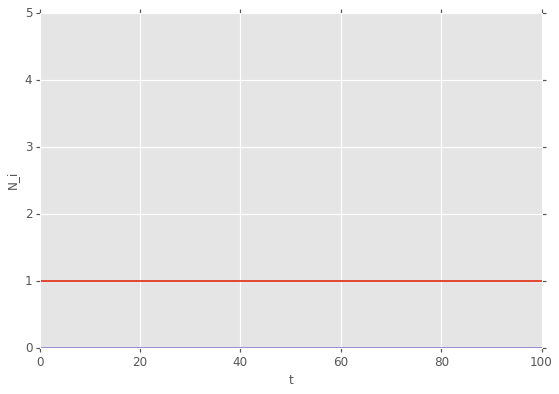

<function python.f05.plot_dcell_cycle>

In [ ]:
interact(plot_dcell_cycle)

However, we can also define this problem in terms of PDEs, and so represent a continuous, gradual transition between stages.

Suppose we represent the degree of maturity using a continuous variable $0\leq \alpha \leq 1$.

We define a cell-age distribution frequency as:

$$ N_j(t) = n(\alpha_j,t)\Delta\alpha,\; \alpha_j = j\Delta\alpha $$

Where $n(\alpha_j,t)$ is the cell density per unit age.
We have:

$$ n(\alpha_{j-1},t) = n(\alpha_j - \Delta\alpha,t) $$

We make a Taylor expansion:

$$ n(\alpha_{j-1},t) = n(\alpha_j,t) - \frac{\partial}{\partial \alpha}n(\alpha_{j-1},t)\,\Delta\alpha + \frac{\partial^2}{\partial \alpha^2}n(\alpha_{j-1},t)\,\frac{\Delta\alpha^2}{2} + \ldots$$

Substituting into our ODE gives:

$$\begin{aligned}
    \frac{d N_j}{d t} &= \lambda(N_{j-1} - N_j) \\
    \frac{\partial}{\partial t}n(\alpha_j,t)\Delta\alpha &= \lambda(n(\alpha_{j-1},t)\Delta\alpha - n(\alpha_j,t)\Delta\alpha) \\
    \frac{\partial}{\partial t}n(\alpha_j,t) &= \lambda\left(n(\alpha_{j-1},t) - n(\alpha_j,t)\right) \\
    \frac{\partial}{\partial t}n(\alpha_j,t) &= \lambda\left(- \frac{\partial}{\partial \alpha}n(\alpha_j,t)\,\Delta\alpha + \frac{\partial^2}{\partial \alpha^2}n(\alpha_j,t)\,\frac{\Delta\alpha^2}{2}\right) \\
    \end{aligned}$$
    
For $k$ stages, $\Delta\alpha = \frac{1}{k}$, so:

$$ \frac{\partial n}{\partial t} + v_0\frac{\partial n}{\partial \alpha} = d_0 \frac{\partial^2 n}{\partial \alpha^2}  $$

Where $v_0 = \frac{\lambda}{k}$ and $d_0 = \frac{v_0}{2k}$.

Thi equation contains a term that resembles diffusion, and one that resembles convective transport ($\text{convection} = \text{velocity}\times\text{flux}$).

### Model discussion

What is the physical meaning of these analogies?

- Variable $x$ corresponds to 'distance' along a 'maturation scale'.
- Convection: velocity is rate of maturation.
- Diffusion: arises from considering maturation as a chain of random transitions, rather than unidirectional flow.

Can cells de-age? What happens when $v_0 \rightarrow 0$?

(Note $d_0 \rightarrow 0$, otherwise if $v_0 =0$ and $d_0>0$, cells could move backwards in the maturation scale.)


## Cellular automata

> A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off (in contrast to a coupled map lattice). The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. [Wikipedia](https://en.wikipedia.org/wiki/Cellular_automaton)

### Elementary cellular automata

> In mathematics and computability theory, an elementary cellular automaton is a one-dimensional cellular automaton where there are two possible states (labeled 0 and 1) and the rule to determine the state of a cell in the next generation depends only on the current state of the cell and its two immediate neighbors. As such it is one of the simplest possible models of computation. Nevertheless, there is an elementary cellular automaton (rule 110, defined below) which is capable of universal computation. [Wikipedia](https://en.wikipedia.org/wiki/Elementary_cellular_automaton)

[Similar patterns have been observed in nature.](https://en.wikipedia.org/wiki/File:Textile_cone.JPG)

> Patterns of some seashells, like the ones in Conus and Cymbiola genus, are generated by natural cellular automata. The pigment cells reside in a narrow band along the shell's lip. Each cell secretes pigments according to the activating and inhibiting activity of its neighbor pigment cells, obeying a natural version of a mathematical rule. The cell band leaves the colored pattern on the shell as it grows slowly. For example, the widespread species Conus textile bears a pattern resembling Wolfram's rule 30 cellular automaton. [Wikipedia](https://en.wikipedia.org/wiki/Cellular_automaton#Biology)

{(1, 1, 0): 0, (0, 0, 0): 0, (0, 1, 1): 0, (1, 0, 0): 0, (1, 1, 1): 0, (0, 0, 1): 0, (0, 1, 0): 0, (1, 0, 1): 0}


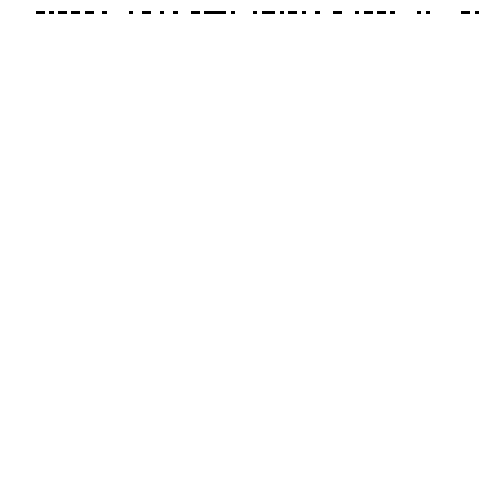

<function python.f05.plot_cell>

In [ ]:
interact(plot_cell)

### The game of life

See notebook: [https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/](https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/)

In [ ]:
# Jupyter notebook setup
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())